In [6]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [7]:
stars = pd.read_csv('McQuillanStars.txt')
stars

,KID,Teff,logg,Mass,Prot,Prot_err,Rper,LPH,w,DC,Flag
0,892376,3813,4.47,0.4699,1.532,0.007,7306.69,0.823,0.4503,0,---
1,1026146,4261,4.57,0.6472,14.891,0.120,11742.56,1.405,0.7229,0,---
2,1026474,4122,4.56,0.5914,1.569,0.006,30471.80,1.204,0.6061,0,---
3,1162635,3760,4.77,0.4497,15.678,0.019,10207.47,0.978,0.5445,1,---
4,1164102,4045,4.62,0.5606,31.496,0.474,5139.74,0.568,0.3939,0,---
...,...,...,...,...,...,...,...,...,...,...,...
34025,12934465,4714,4.88,0.7591,34.910,1.692,4572.33,0.433,0.2969,0,---
34026,12934525,5278,4.72,0.9062,25.101,0.240,5150.14,0.573,0.4144,0,---
34027,12934557,5341,4.58,0.9227,31.226,0.729,1889.88,0.401,0.2511,0,---
34028,12984138,4960,4.57,0.8239,12.059,0.038,11734.90,1.194,0.6442,0,---


In [8]:
solar_Teff = 5777 # K
solar_logg = 4.44 # from https://adsabs.harvard.edu/full/2005MSAIS...8..130S

In [9]:
# get stars within 10% of the temp of the sun
Teff_q1 = stars['Teff'] >= 0.9*solar_Teff
Teff_q2 = stars['Teff'] <= 1.1*solar_Teff
Teff_query = (Teff_q1) & (Teff_q2)

# get stars within 10% of the surface gravity
logg_q1 = stars['logg'] >= 0.9*solar_logg
logg_q2 = stars['logg'] <= 1.1*solar_logg
logg_query = (logg_q1) & (logg_q2)


stars_subset = stars[(Teff_query) & (logg_query)]
stars_subset

,KID,Teff,logg,Mass,Prot,Prot_err,Rper,LPH,w,DC,Flag
5722,891916,5407,4.59,0.9400,5.522,0.154,13677.78,1.483,0.7627,0,---
5727,893165,6025,4.06,1.1147,54.874,3.786,869.51,0.603,0.2771,0,---
5728,893286,5252,4.73,0.8995,28.211,0.872,7541.98,0.705,0.4328,0,---
5734,1025986,5966,4.13,1.0966,9.724,0.016,16745.51,0.885,0.5803,0,---
5738,1027740,5751,4.13,1.0337,26.697,1.715,5059.42,0.454,0.2686,0,---
...,...,...,...,...,...,...,...,...,...,...,...
34021,12884566,5416,4.74,0.9424,23.740,0.450,4299.88,0.593,0.4161,0,---
34022,12884589,5863,4.58,1.0660,10.589,0.027,14634.70,1.040,0.6449,0,---
34024,12934451,5556,4.46,0.9798,17.244,0.567,2147.85,0.435,0.2970,0,---
34026,12934525,5278,4.72,0.9062,25.101,0.240,5150.14,0.573,0.4144,0,---


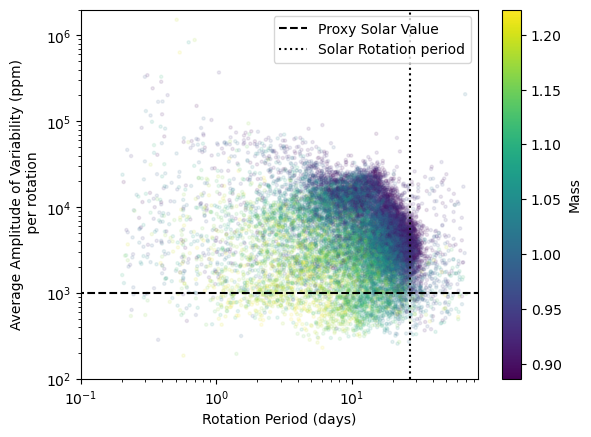

In [10]:
sc_fake = plt.scatter(stars_subset['Prot'], stars_subset['Rper'], c=stars_subset['Mass'], alpha=1, s = 0, cmap = 'viridis')
sc = plt.scatter(stars_subset['Prot'], stars_subset['Rper'], c=stars_subset['Mass'], alpha=0.1, cmap = 'viridis', s = 5)
plt.yscale('log'); plt.xscale('log')
plt.ylabel('Average Amplitude of Variability (ppm)\n per rotation')
plt.xlabel('Rotation Period (days)')
plt.colorbar(sc_fake, label='Mass')
plt.hlines(1000, 0, 90, ls = '--', color = 'black', label = 'Proxy Solar Value') # sun has about 0.1% variation (although, thats peak-to-peak, not average per rot)
plt.vlines(27,1e2, 2e6, ls = ':', color = 'black', label = 'Solar Rotation period')
plt.xlim([0.1, 85]); plt.ylim([1e2,2e6])
plt.legend()

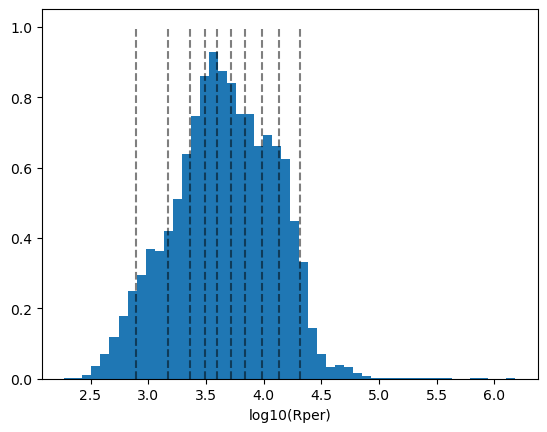

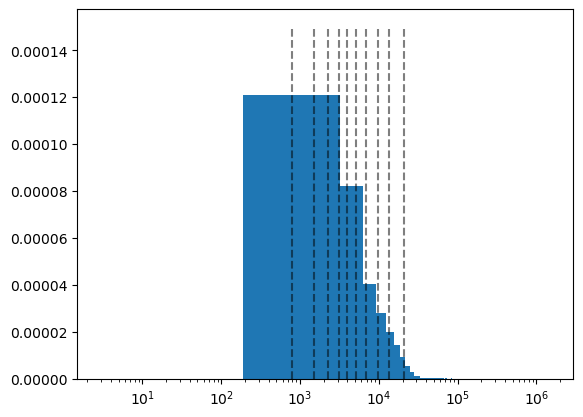

In [80]:

target_ind = np.quantile(np.log10(stars_subset['Rper']), np.linspace(0,1,11)[:-1]+0.05)

_ = plt.hist(np.log10(stars_subset['Rper']), bins = 50, density = True)
plt.xlabel('log10(Rper)')
plt.vlines(target_ind, 0, 1, ls = '--', color = 'black', alpha = 0.5)

plt.figure()
_ = plt.hist(stars_subset['Rper'], bins = 500, density = True)
# plt.yscale('log')
plt.xscale('log')
plt.vlines(10**target_ind, 0, 0.00015, ls = '--', color = 'black', alpha = 0.5)


In [48]:
np.linspace(0,1,11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

array([2.27332542, 3.04452407, 3.2811084 , 3.42753804, 3.5473924 ,
       3.65398583, 3.77528328, 3.90961368, 4.05721788, 4.20859414,
       6.18175377])

Rper (the y-axis in the above figure) is defined by McQuillan as: 

We define this as a measure of the range between the 5th and 95th percentile of normalized flux. We divide each LC into sections of period length and measure the 5th to 95th percentile of normalized flux in each section. We then take the median of these values as the amplitude of periodic variability, Rper, for the LC.

We can assume that most of the stars are edge on. Both statistically (due to random inclinations favouring edge on), but also their method uses autocorrelation of lightcurves, which would be modulated by spot crossings. It is much more likely for a edge on star to produce a robust autocorrelation curve that would yeild a rotation period than for a pole on star. 

In [12]:
from Functions import *

1.00e+00 9.97e-01
[3072.68028142]


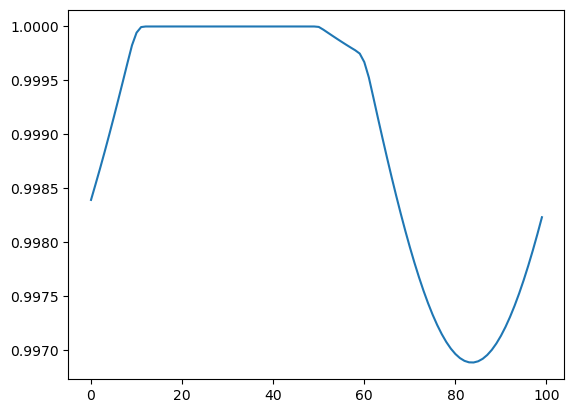

In [13]:
num_pts = 250**2

thetas, phis = generate_surface_points(num_pts, 1)

spot_thetas = np.array([0, np.pi/5])
spot_phis   = np.array([0, 0])
spot_radii  = np.array([0.04, 0.1])
obs_phi     = np.array([0])*np.pi/180

spotted_idx = get_spotted_idx(spot_phis, spot_thetas, spot_radii, n = num_pts)

lc = get_light_curve(obs_phi, phis, thetas, spotted_idx, 100, contrast = 0.7)
plt.plot(lc/np.max(lc))
print(f'{np.max(lc):.2e}', f'{np.min(lc):.2e}')
lc_amp_ppm = np.array([(np.percentile(lc, 95) - np.percentile(lc, 5)) * 1e6])
print(lc_amp_ppm)

In [23]:
belgium = pd.read_csv('BelgiumMonthlySunspotNum.csv')
spot_num_time_series = np.round(belgium['Monthly_Mean_Sunspot_Number'].values)
obs_phi = np.array([0])*np.pi/180
spot_ratio = np.array([1,1])
latitude_method = ['butterfly']
radii_method = [('Nagovitsyn', True, 1), ('Baumann Group Max', False, 1)]


results = make_observations_parallel(n_rotations = 120, 
                            num_spots = spot_num_time_series,
                            radii_method = radii_method,
                            radii_probs = np.array([0.15, 0.85]),
                            latitude_method = latitude_method,
                            obs_phi = obs_phi,
                            num_spots_type = 'Dist',
                            suppress_output = False,
                            return_full_data = False, 
                            spot_ratio = spot_ratio, n_processes = 4,
                            num_surf_pts = 300**2, return_Rper = True)

results['obs_phi'] = obs_phi
results['radii_method'] = radii_method
results['latitude_method'] = latitude_method
results['spot_ratio'] = spot_ratio
results['radii_probs'] = np.array([0.15, 0.85])
results


        execution time to increase by a factor of a few. This is because
        this feature was a late addition and has not been optimised.
        


Simulating Star...:   0%|          | 0/120 [00:00<?, ?it/s]

Bootstrapping...:   0%|          | 0/10000 [00:00<?, ?it/s]

Bootstrapping...:   0%|          | 0/10000 [00:00<?, ?it/s]

Bootstrapping...:   0%|          | 0/10000 [00:00<?, ?it/s]

Bootstrapping...:   0%|          | 0/10000 [00:00<?, ?it/s]

{'xs_std': 0.2220047158606351,
 'ys_std': 0.10442572700571655,
 'Rper': 365.1940382718433,
 'Rper_max': 3574.1461447594825,
 'xs_std_err': 0.012315901729471501,
 'ys_std_err': 0.006697016657407843,
 'xs_std_ci': (0.1980818216195291, 0.2463809309877436),
 'ys_std_ci': (0.09135947666856331, 0.11752026739532107),
 'Rper_err': 37.44227814428844,
 'Rper_ci': (288.5986537586316, 433.11602282625205),
 'Rper_max_err': 222.53978175357966,
 'Rper_max_ci': (2834.646316694389, 3574.1461447594825),
 'obs_phi': array([0.]),
 'radii_method': [('Nagovitsyn', True, 1), ('Baumann Group Max', False, 1)],
 'latitude_method': ['butterfly'],
 'spot_ratio': array([1, 1]),
 'radii_probs': array([0.15, 0.85])}

In [15]:
# The Photometric Variability of Sun-like Stars: Observations and Results, 1984–1995
# G. W. LOCKWOOD AND BRIAN A. SKIFF
# typical is 0.2 (200ppm) and up to 1% (1000ppm)

# 0 degs
# {'xs_std': 0.20059073207963027,
 # 'ys_std': 0.09601228624621044,

# 45 degs
# {'xs_std': 0.15254490157406464,
#  'ys_std': 0.1290908674419961,

# 90 degrees
# {'xs_std': 0.06761038099757585,
#  'ys_std': 0.06761038099757585,

# -----------------------------------------
#   with Rper
# 90 degs
# {'xs_std': 0.11156282865595428,
#  'ys_std': 0.11156282865595428,
#  'Rper': 0.0,
#
# 45 degs
# {'xs_std': 0.1414588618271304,
#  'ys_std': 0.09659974210337846,
#  'Rper': 185.90160909304208,
#
# 0 degs
# {'xs_std': 0.2220047158606351,
#  'ys_std': 0.10442572700571655,
#  'Rper': 365.1940382718433,


In [90]:
target_ind[1]

3.1750783636440345

In [96]:
for i in range(len(target_ind)):
    print(10**target_ind[i])

780.8079991701285
1496.5056596568675
2288.460000000001
3089.2739998601623
3971.9439943420175
5188.143990858163
6950.341907066921
9646.589999999998
13518.711752547893
20710.88359171463


In [ ]:
# Two methods - more spots, or larger spots, or some mix of both.
# Maybe write a function that iterates through all combinations?
# See what the overall trend is?

In [118]:
belgium = pd.read_csv('BelgiumMonthlySunspotNum.csv')
spot_num_time_series = np.round(belgium['Monthly_Mean_Sunspot_Number'].values*2)
obs_phi = np.array([0])*np.pi/180
spot_ratio = np.array([1])
latitude_method = ['butterfly']
radii_method = [('Baumann Group Max', True, 1)]


results = make_observations_parallel(n_rotations = 120, 
                            num_spots = spot_num_time_series,
                            radii_method = radii_method,
                            radii_probs = np.array([1]),
                            latitude_method = latitude_method,
                            obs_phi = obs_phi,
                            num_spots_type = 'Dist',
                            suppress_output = False,
                            return_full_data = False, 
                            spot_ratio = spot_ratio, n_processes = 4,
                            num_surf_pts = 300**2, return_Rper = True)

results['obs_phi'] = obs_phi
results['radii_method'] = radii_method
results['latitude_method'] = latitude_method
results['spot_ratio'] = spot_ratio
results['radii_probs'] = np.array([0.15, 0.85])
results


        execution time to increase by a factor of a few. This is because
        this feature was a late addition and has not been optimised.
        


Simulating Star...:   0%|          | 0/120 [00:00<?, ?it/s]

Bootstrapping...:   0%|          | 0/10000 [00:00<?, ?it/s]

Bootstrapping...:   0%|          | 0/10000 [00:00<?, ?it/s]

Bootstrapping...:   0%|          | 0/10000 [00:00<?, ?it/s]

Bootstrapping...:   0%|          | 0/10000 [00:00<?, ?it/s]

{'xs_std': 0.08704232833510608,
 'ys_std': 0.04126565797845516,
 'Rper': 195.92081796382388,
 'Rper_max': 985.4462631782023,
 'xs_std_err': 0.0034826287833779166,
 'ys_std_err': 0.00140879208230429,
 'xs_std_ci': (0.08015220715038912, 0.09394990549651733),
 'ys_std_ci': (0.03847625266018325, 0.04398157881798541),
 'Rper_err': 26.21669930617612,
 'Rper_ci': (142.24197388024163, 232.87067525290527),
 'Rper_max_err': 69.77561102929475,
 'Rper_max_ci': (782.3591977296207, 985.4462631782023),
 'obs_phi': array([0.]),
 'radii_method': [('Baumann Group Max', True, 1)],
 'latitude_method': ['butterfly'],
 'spot_ratio': array([1]),
 'radii_probs': array([0.15, 0.85])}

In [132]:
25**2

625

In [137]:
size_multi = np.linspace(1, np.sqrt(10), 25)  # 10 points from 1 to sqrt(10)
num_multi = np.linspace(1, 5, 25)             # 5 points from 1 to 5

# Generate the meshgrid and flatten to 2D array
grid_col1, grid_col2 = np.meshgrid(size_multi, num_multi)
flattened_array = np.column_stack((grid_col1.ravel(), grid_col2.ravel()))
flattened_array[8,:]

array([1.72075922, 1.        ])